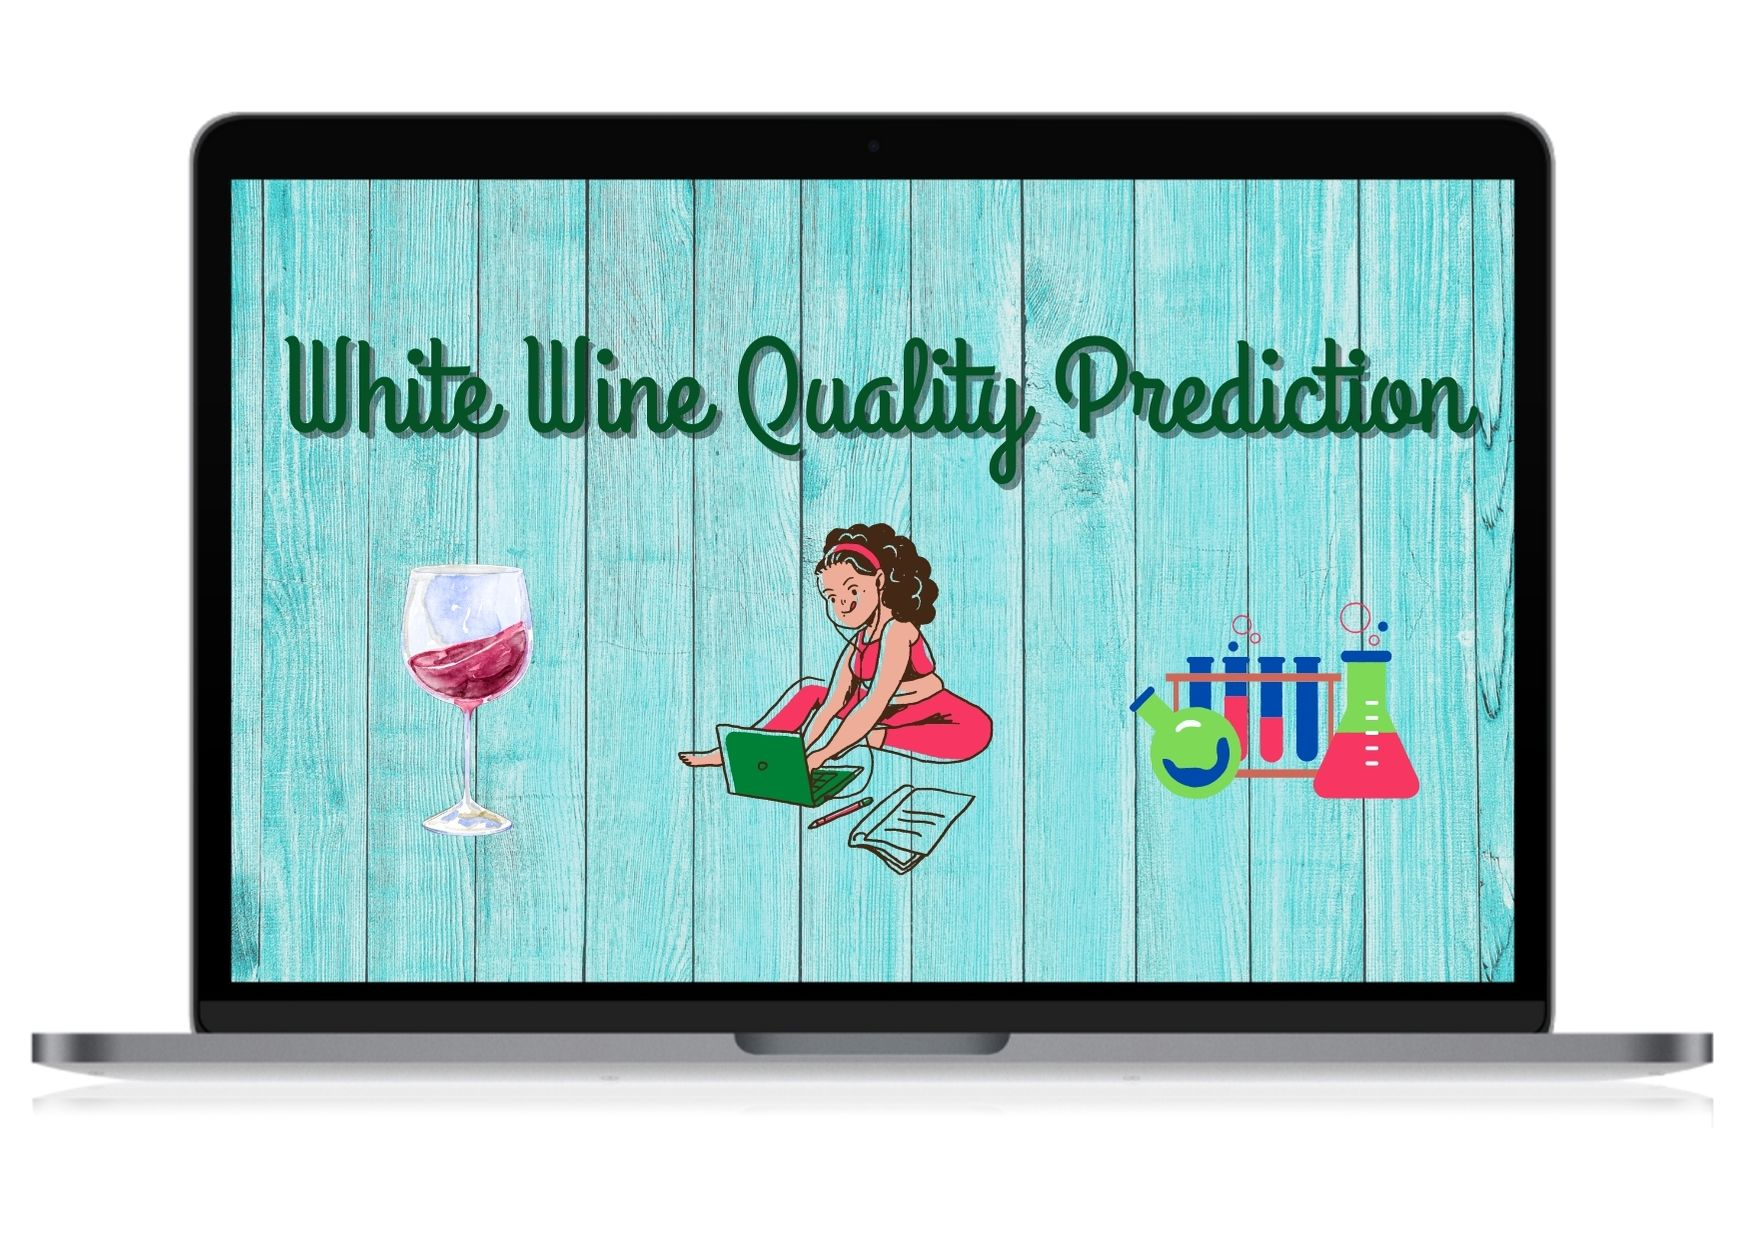

<blockquote>📌 This model uses the famous Wine Quality Data Set provided by UCI Repository.

Dataset downloaded from UCI Repository at https://archive.ics.uci.edu/ml/datasets/Wine+Quality


Source:

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009
    
Using White Wine Dataset for model training and validation
</blockquote>

### <h3 style="background-color:#bf0fff;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
# getting started with the model 
# importing required libraries/packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import time for training details
from time import time
t0 = time()

import warnings
warnings.filterwarnings('ignore')

### <h3 style="background-color:#bf0fff;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;"><strong><centre>Reading the dataset 📝 </centre></strong></h3>

In [2]:
# Importing and Reading the Dataset
df_wine= pd.read_csv('../input/winequalitywhitecsv/winequality-white.csv')

In [3]:
df_wine_row_count, df_wine_column_count=df_wine.shape
print('Total number of rows:', df_wine_row_count)
print('Total number of columns:', df_wine_column_count)

Total number of rows: 4898
Total number of columns: 12


### <h3 style="background-color:#bf0fff;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [4]:
# check to see if there are any missing entries
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_wine.head().iloc[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
print ("Unique values are:\n",df_wine.nunique())

Unique values are:
 fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [8]:
#checking Datatypes
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

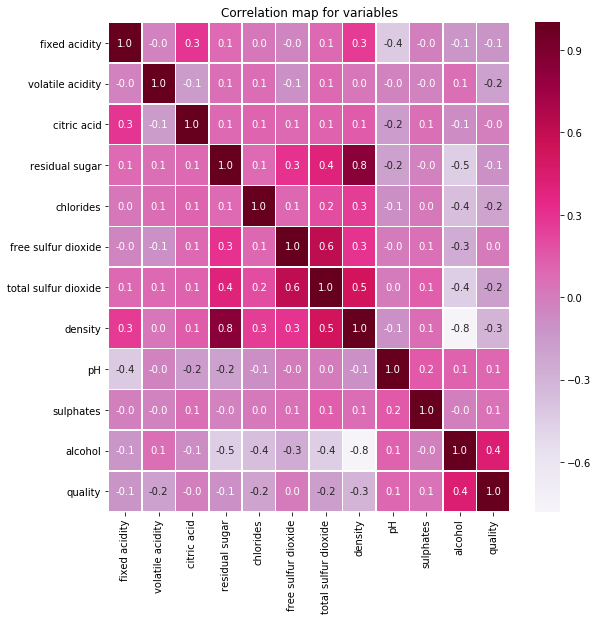

In [9]:
#correlation map for features
f,ax = plt.subplots(figsize=(9, 9))
ax.set_title('Correlation map for variables')
sns.heatmap(df_wine.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="PuRd")

### <h3 style="background-color:#bf0fff;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;"><strong><centre>Data Exploration for the Dataset 🔍 </centre></strong></h3>

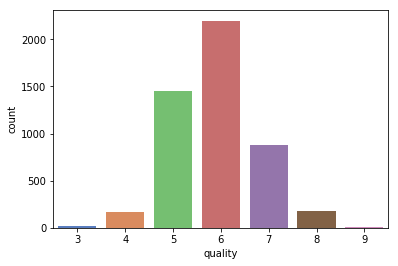

In [10]:
#Getting an idea about the distribution of wine quality 
p = sns.countplot(data=df_wine, x = 'quality', palette='muted')

In [11]:
df_wine['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<blockquote>📌 Note: From the figure & code above, it appears that target variable "quality" (range from 3 to 9), values 5 and 6 make up more than 60% of the dataset indicating that this class is unbalanced.</blockquote>

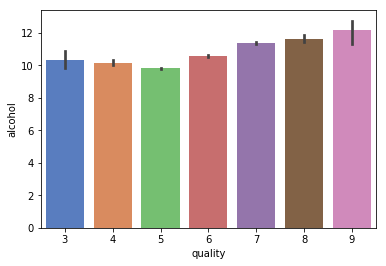

In [12]:
#'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
# 'pH', 'sulphates', 'alcohol', 'quality'
#Getting an idea about the distribution of wine quality 

p = sns.barplot(data=df_wine, x = 'quality',y='alcohol', palette='muted')

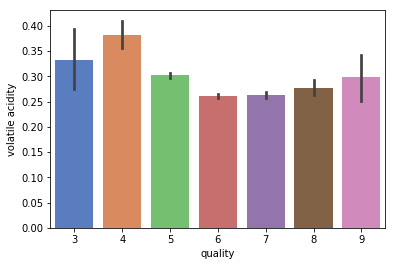

In [13]:
p = sns.barplot(data=df_wine, x = 'quality',y='volatile acidity',palette='muted')

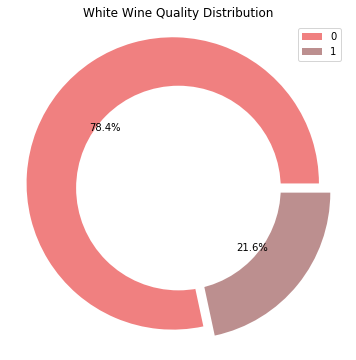

The amount of good quality white wine is  21.6 %.
mean white wine quality =  5.87790935075541


In [14]:
#Grouping the wine based on grade
# Defining 'grade' of wine

#Good wine
df_wine['grade'] = 1 

#Bad wine
df_wine.grade[df_wine.quality < 6.5] = 0 

#sns.set(style="whitegrid")
#p = sns.countplot(data=df_wine, x='grade', palette='muted')

#set plotsize and colors

plt.figure(figsize = (6,6))
colors = ['lightcoral', 'rosybrown']

labels = df_wine.grade.value_counts().index
explode = (0.05,0.05)
plt.pie(df_wine.grade.value_counts(), autopct='%1.1f%%',colors=colors,explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, loc="Best")
plt.axis('equal')
plt.title('White Wine Quality Distribution')
plt.show()
#Show mean quality of white wine and quality distribution

print('The amount of good quality white wine is ',round(df_wine.grade.value_counts(normalize=True)[1]*100,1),'%.')
print("mean white wine quality = ",df_wine["quality"].mean())

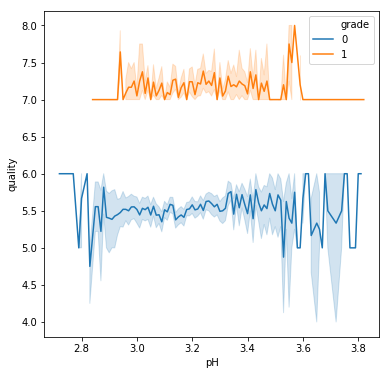

In [15]:
# plot to see how pH is varying in the grade of white wine

plt.figure(figsize=(6,6))
ax = sns.lineplot(x="pH", y="quality", hue="grade", data=df_wine,markers=True)

In [16]:
df_wine['grade'].value_counts() #prints counts of good and bad white wine

0    3838
1    1060
Name: grade, dtype: int64

In [17]:
#Checking once more for column names
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'grade'],
      dtype='object')

In [18]:
#Defining X and y
X = df_wine.drop(['quality'], axis=1)
y = df_wine['quality']

### <h3 style="background-color:#bf0fff;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;"><strong><centre>Dataset split for prediction ⏳ </centre></strong></h3>

In [19]:
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3918, 12)
y_train: (3918,)
X_test: (980, 12)
y_test: (980,)


<div style="background-color:#c5f9d7;color:#103783;text-align: center;padding-top: 2px;padding-bottom: 2px;"><centre><br><strong>Now, Predicting White Wine Quality using:</strong><br>
    1. Random Forest Classifier<br>
    2. Gaussian Naive Bayes Classifier<br>
    3. Decision Tree Classifier<br>
    4. KNeighbors Classifier<br>
    5. SVM Classifier </centre></div>

In [20]:
# 1. Using Random Forest Classifier
t0 = time()
# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', round(time() - t0, 3), 's')

Random Forest Classifier Accuracy: 77.65306122448979 %
Training time 0.491 s


In [21]:
#2. Gaussian Naive Bayes Classifier
t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', round(time() - t0, 3), 's')

Naive Bayes Accuracy: 66.42857142857143 %
Training time 0.027 s


In [22]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
clf = clf.fit(X_train,y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', round(time() - t0, 3), 's')

Decision Tree Accuracy: 69.48979591836735 %
Training time 0.067 s


In [23]:
#kNN
import sys, os

# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier/fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', round(time() - t0, 3), 's')

kNN Accuracy: 50.71428571428571 %
Training time 0.144 s


In [24]:
#Support Vector Machines trial
import sys, os

#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)

# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', round(time() - t0, 3), 's')

SVM Accuracy: 59.795918367346935 %
Training time 2.554 s


Note: Algorithm training times are checked only for information purpose and not used anywhere else in the model.

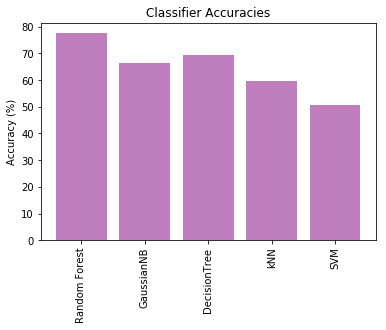

In [25]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_svm,acc_knn]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [26]:
#printing top three accuracies

print('Decision Tree:', acc_dt,'%')
print('Random Forest:', acc_rf,'%')
print('GaussianNB:',acc_gnb,'%')

Decision Tree: 69.49 %
Random Forest: 77.65 %
GaussianNB: 66.43 %


### <h3 style="background-color:#bf0fff;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;"><strong><centre>📉 Reducing overfitting using Cross Validation for top three Algorithms -> RF, DT and GNB </centre></strong></h3>

In [27]:
# importing the model for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# creating list of tuple wth model and its name  
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))

In [28]:
# Import Cross Validation 
from sklearn.model_selection import cross_val_score

# simulate splitting a dataset of 1000 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)
# print(kf)

acc = []   # All Algorithm/model accuracies
names = []    # All model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling
    
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

('DT', 69.22)
('RF', 75.39)
('GNB', 65.8)


### <h3 style="background-color:#bf0fff;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;"><strong><centre>Plotting all accuracies 📊 </centre></strong></h3>

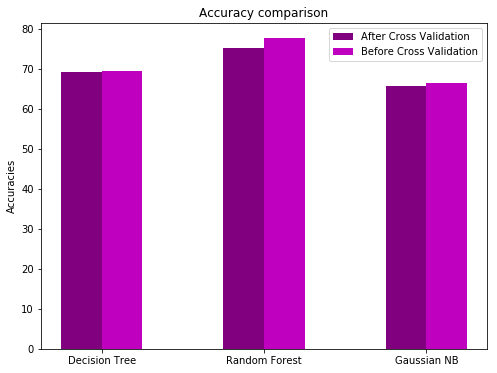

In [29]:
# Plotting all accuracies together for comparison

labels = ['Decision Tree', 'Random Forest','Gaussian NB']

NoCV =[69.49 ,77.65,66.43] # accuracy before Cross Validation
CV=[69.24, 75.14, 65.8] # accuracy after Cross Validation

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(8,6)) 
p1 = ax.bar(x - width/2, CV, width, label='After Cross Validation', color='purple')
p2 = ax.bar(x + width/2, NoCV, width, label='Before Cross Validation', color='m')

# Add some text for labels and title 
ax.set_ylabel('Accuracies')
ax.set_title('Accuracy comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='top right')
plt.show()

<div style="background-color:#c5f9d7;color:#103783;text-align: center;padding-top: 2px;padding-bottom: 5px;"><centre><br><strong>On comparison, the accuracies do not seem to drastically change, but do seem a bit reduced after cross validation which means that  K-fold cross validation is giving a better approximation for those accuracies.
From the bar plot, Random Forest appears to be providing the better accuracies followed by Decision Tree in predicting the white wine quality. 
    Using this outcome, Random forest and Decision Tree can be applied to the dataset.</strong></centre></div>

<blockquote>📌The purpose of this notebook is to check the application of learned machine learning techniques of Data Exploration, Algorithm selection to an available Dataset for Learning & Educational purpose.</blockquote>